In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ["Tshirt", "Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
#28 * 28 --> 784 features at once

In [ ]:
y_train[0]

9

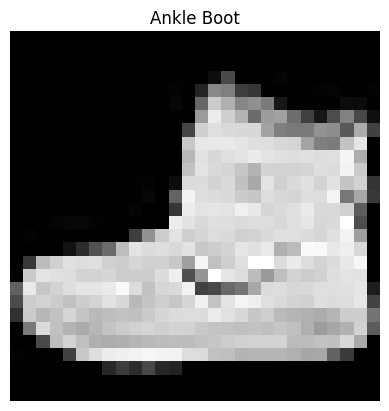

In [ ]:
plt.imshow(x_train[0], cmap = "gray")
plt.title(class_names[y_train[0]])
plt.axis(False)
plt.show()

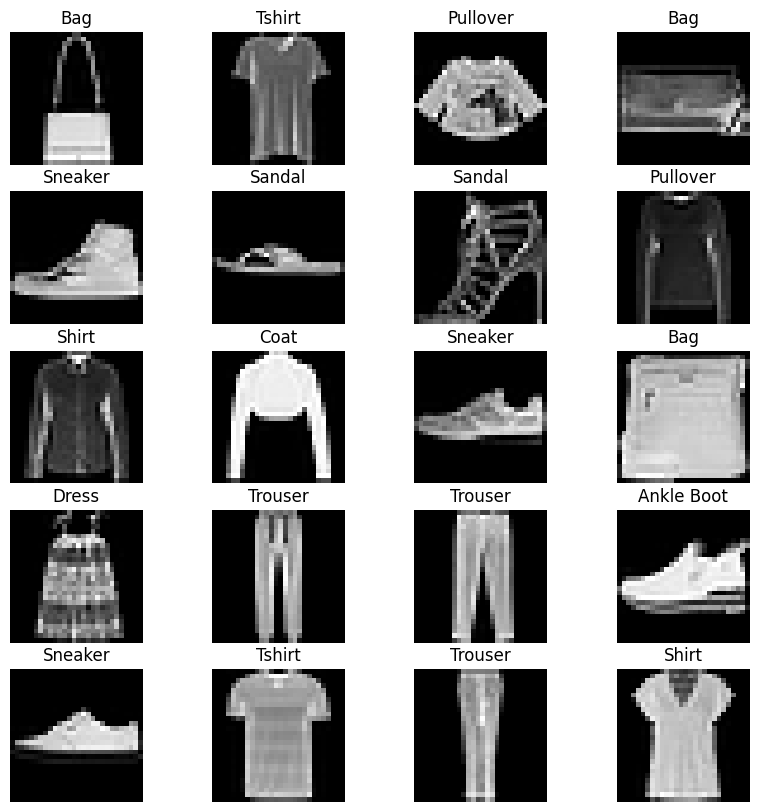

In [ ]:
indices = np.random.randint(0,60000, 20)
plt.figure(figsize=(10,10))

for i in range(len(indices)):
  plt.subplot(5,4, i+1)
  plt.imshow(x_train[indices[i]], cmap = "gray")
  plt.title(class_names[y_train[indices[i]]])
  plt.axis(False)
plt.show()


In [ ]:
#normalization of images
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)), #we flatten the images so that it becomes (1,784)
    Dense(128, activation = "relu"), #hidden layer that contains 128 neurons
    Dense(10) #output layer that contains 10 neurons (we have data that has data of 10 classes)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss is taken as SparseCategoricalCrossentropy since it is the case of multi classification
#from_logists will give probability by itself, since we haven't added any activation function in the output layer
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
#in the metrics part you can also add precision, recall as metrics = ['accuracy', 'precision', 'recall']

model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4959 - accuracy: 0.8254 - val_loss: 0.4187 - val_accuracy: 0.8510
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3717 - accuracy: 0.8649 - val_loss: 0.3768 - val_accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3337 - accuracy: 0.8777 - val_loss: 0.3585 - val_accuracy: 0.8690
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3117 - accuracy: 0.8856 - val_loss: 0.3584 - val_accuracy: 0.8678
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2932 - accuracy: 0.8913 - val_loss: 0.3448 - val_accuracy: 0.8777
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2777 - accuracy: 0.8972 - val_loss: 0.3331 - val_accuracy: 0.8810
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2663 - accuracy: 0.9025 - val_loss: 0.3405 - val_accuracy

In [ ]:
model.predict(x_test[100].reshape(1,28,28))

1/1 [==============================] - 0s 58ms/step


array([[ -0.32996047,  -3.95292   ,  -5.299715  ,   4.6711335 ,
         -4.8913302 ,  -8.619922  ,  -0.99079734, -14.666499  ,
         -7.185074  , -10.540211  ]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

1/1 [==============================] - 0s 40ms/step


3

In [ ]:
class_names[3]

'Dress'

In [ ]:
y_test[100]

3

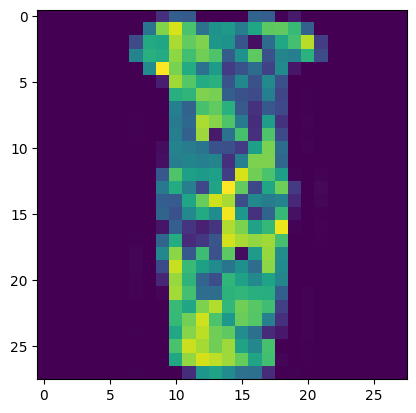

In [ ]:
plt.imshow(x_test[100])

In [ ]:
#this is the simple ANN of this images data